In [87]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [88]:
origin = read_excel("https://data.hossam.kr/F03/wine_3type.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  kind 

In [89]:
origin.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
kind                            0
dtype: int64

In [90]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [91]:
origin['kind']

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: kind, Length: 178, dtype: object

In [92]:
origin['kind'] = origin['kind'].astype('category').cat.rename_categories({'class_0': 0, 'class_1': 1, 'class_2': 2})
origin['kind'].value_counts()

kind
1    71
0    59
2    48
Name: count, dtype: int64

In [93]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


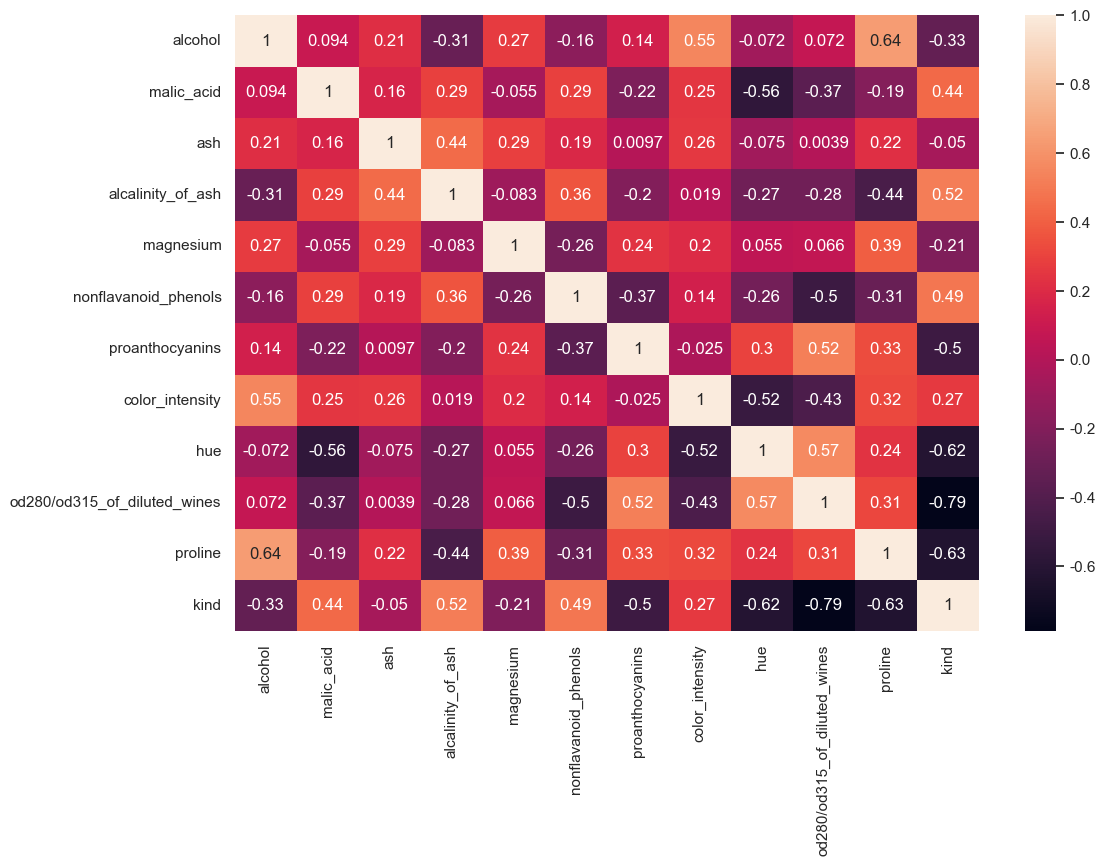

In [94]:
df = origin.copy()
df = origin.drop(['total_phenols', 'flavanoids'], axis=1)
plt.figure(figsize=(12,8))
sb.set(font_scale=1.0)
sb.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [95]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [96]:
x = df[['proline','od280/od315_of_diluted_wines','hue', 'proanthocyanins', 'nonflavanoid_phenols', 'alcalinity_of_ash', 'malic_acid']]
y = df['kind']
x.shape, y.shape

((178, 7), (178,))

In [97]:
from sklearn.preprocessing import StandardScaler
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
print(x_scale.shape)
x_scale

(178, 7)


array([[ 1.01300893,  1.84791957,  0.36217728, ..., -0.65956311,
        -1.16959318, -0.5622498 ],
       [ 0.96524152,  1.1134493 ,  0.40605066, ..., -0.82071924,
        -2.49084714, -0.49941338],
       [ 1.39514818,  0.78858745,  0.31830389, ..., -0.49840699,
        -0.2687382 ,  0.02123125],
       ...,
       [ 0.28057537, -1.48544548, -1.61212515, ...,  0.5491078 ,
         0.15166079,  1.74474449],
       [ 0.29649784, -1.40069891, -1.56825176, ...,  1.3548884 ,
         0.15166079,  0.22769377],
       [-0.59516041, -1.42894777, -1.52437837, ...,  1.59662258,
         1.50294326,  1.58316512]])

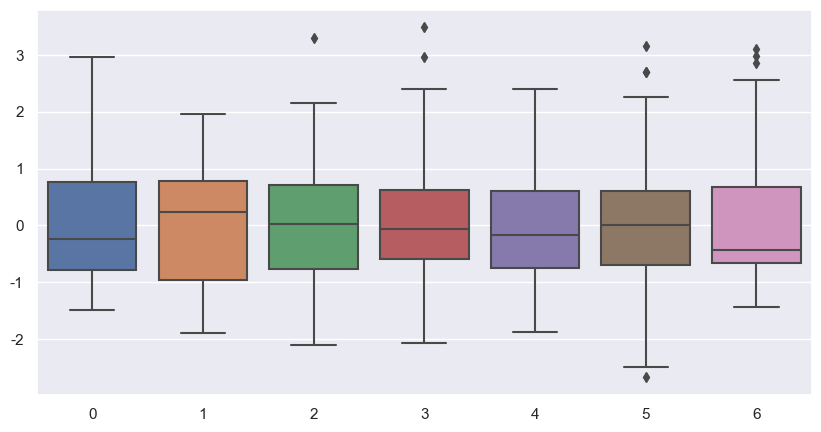

In [98]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=x_scale)
plt.show()
plt.close()

In [99]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: kind, Length: 178, dtype: category
Categories (3, int64): [0, 1, 2]

In [100]:
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cate, test_size=0.3, random_state=777)
print("훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s" % (x_train.shape, y_train.shape))
print("검증용 데이터셋 크기: %s, 검증용 레이블셋 크기: %s" % (x_test.shape, y_test.shape))

훈련용 데이터셋 크기: (124, 7), 훈련용 레이블셋 크기: (124, 3)
검증용 데이터셋 크기: (54, 7), 검증용 레이블셋 크기: (54, 3)


In [102]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dense(3, activation='softmax')) # 종속변수가 3개
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1024      
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500


4/4 [==============================] - 1s 44ms/step - loss: 26.3223 - acc: 0.3629 - val_loss: 7.2920 - val_acc: 0.2963 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 5.6474 - acc: 0.3145 - val_loss: 7.5263 - val_acc: 0.3889 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 7.1427 - acc: 0.4032 - val_loss: 8.4205 - val_acc: 0.3148 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 5.4353 - acc: 0.3952 - val_loss: 3.5926 - val_acc: 0.3889 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 3.0001 - acc: 0.2823 - val_loss: 3.8871 - val_acc: 0.2963 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 2.3575 - acc: 0.3306 - val_loss: 2.2509 - val_acc: 0.3889 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 2.1674 - acc: 0.3145 - val_loss: 1.9377 - val_acc: 0.2778 - lr: 0.0010
Epoch 8/500
4/4 

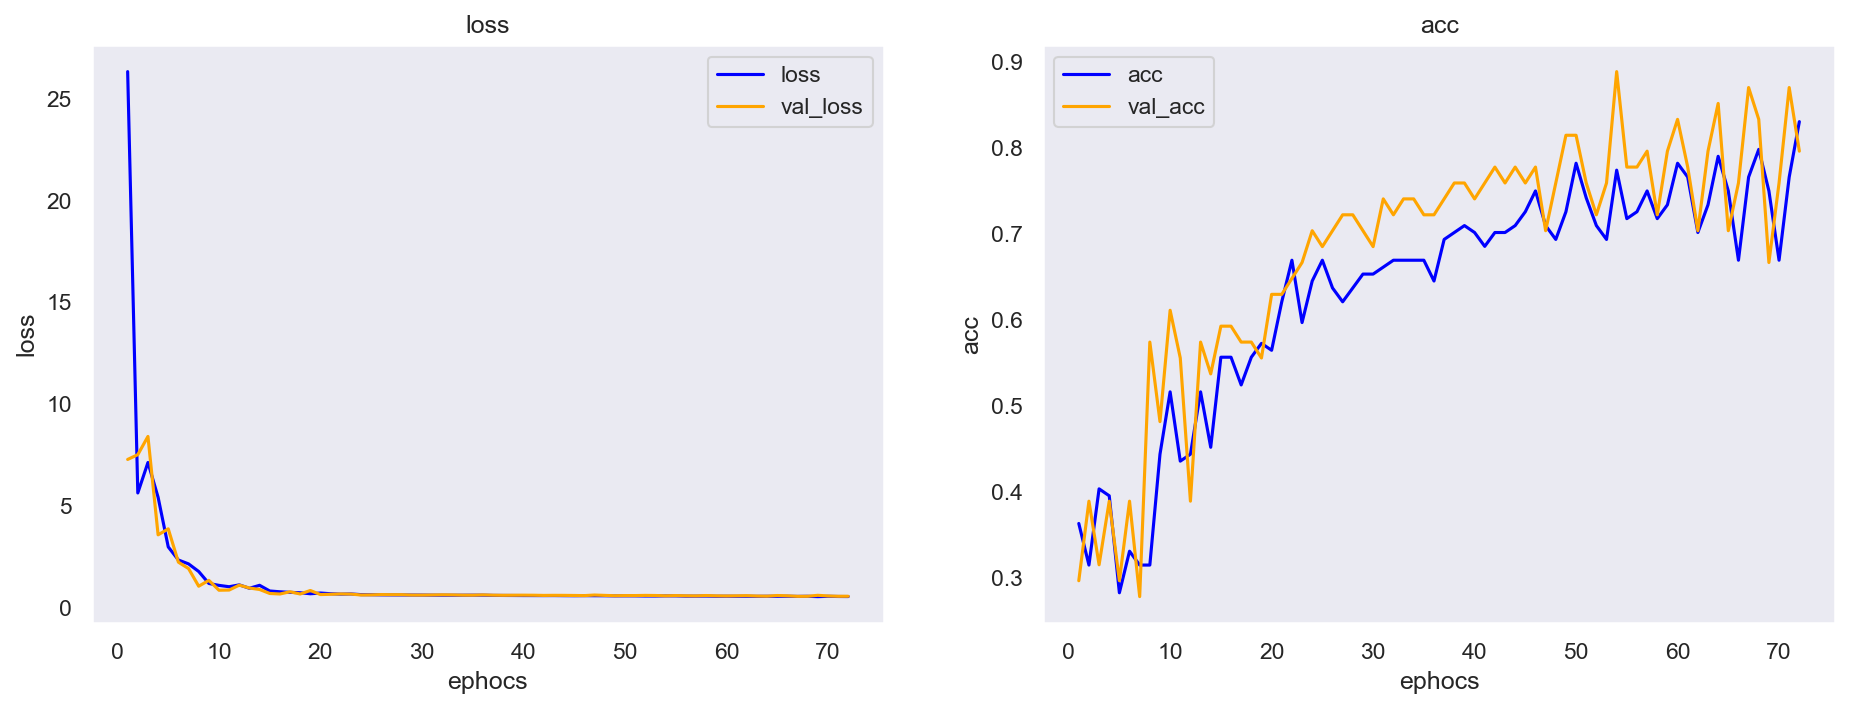

4/4 [==============================] - 0s 2ms/step - loss: 0.5550 - acc: 0.7984
최종 훈련 손실률: 0.554952, 최종 훈련 정확도: 0.798387
2/2 [==============================] - 0s 3ms/step - loss: 0.5785 - acc: 0.7963
최종 검증 손실률: 0.578467, 최종 검증 정확도: 0.796296


In [104]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

In [105]:
results = model.predict(x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다." % (data_count, case_count))

print(results)

[scatterd] >WARNING> 5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x0000010F20983F70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 5ms/step
54개의 검증 데이터가 각각 3개의 경우의 수를 갖는다.
[[9.64718759e-01 2.39325855e-02 1.13486415e-02]
 [1.48108780e-01 5.36631942e-01 3.15259248e-01]
 [2.48843059e-02 4.50675189e-01 5.24440527e-01]
 [5.06970324e-02 5.79619706e-01 3.69683266e-01]
 [9.99327660e-01 4.16058028e-04 2.56332860e-04]
 [8.31545711e-01 1.23418078e-01 4.50362675e-02]
 [2.77824607e-02 5.67275345e-01 4.04942185e-01]
 [9.78203416e-01 1.35212708e-02 8.27532820e-03]
 [7.68573768e-03 6.29949510e-01 3.62364680e-01]
 [4.73682880e-02 5.28320074e-01 4.24311697e-01]
 [1.02899812e-01 3.70426655e-01 5.26673496e-01]
 [2.76874721e-01 2.88554639e-01 4.34570581e-01]
 [9.88503754e-01 7.19447061e-03 4.30185487e-03]
 [1.51855387e-02 6.68382943e-01 3.16431463e-01]
 [3.46599817e-02 3.99171829e-01 5.66168189e-01]
 [1.93624441e-02 4.29024756e-01 5.51612854e-01]
 [4.35218781e-01 2.63149738e-01 3.01631451e-01]
 [6.96772993e-01 1.43613800e-01 1.59613207e-01]
 [9.56124291e-02 5.12911558e-01 3.91475976e-01]
 [2.5

In [106]:
arg_results = np.argmax(results, axis=-1)
arg_results

array([0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [107]:
result_df = DataFrame({
    '실제값': np.argmax(y_test, axis = -1),
    '분류결과': arg_results
})

result_df

,실제값,분류결과
0,0,0
1,0,1
2,2,2
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,2,1
